In [1]:
%matplotlib inline 
import random 
import torch 
from d2l import torch as d2l 

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.5755, 1.3442]) 
label: tensor([0.7994])


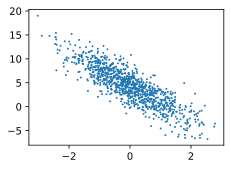

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

# 读取数据集

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取样本
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [44]:
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[-0.1448,  0.0867],
        [ 0.5099,  0.3625],
        [ 1.3843, -0.5753],
        [ 1.1809,  0.6567],
        [ 1.0400, -1.1208],
        [ 0.1323, -0.8038],
        [-0.8304, -0.1213],
        [ 0.4424,  0.6803],
        [-1.3809, -1.1762]]) 
 tensor([[ 3.6268],
        [ 3.9905],
        [ 8.9251],
        [ 4.3266],
        [10.1107],
        [ 7.1981],
        [ 2.9693],
        [ 2.7620],
        [ 5.4388]])


# 初始化模型参数

In [24]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型

In [10]:
def linreg(X, w, b): #@save
    """线性回归"""
    return torch.matmul(X, w) + b

In [47]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 定义优化算法

In [40]:
def sgd(params, lr, batch_size):
    """小批量梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size 
            param.grad.zero_()

# 训练

In [48]:
lr = 0.03 
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.sum().backward()
        sgd([w, b], lr ,batch_size)  # 更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000052


In [42]:
with torch.no_grad(): # 这样可以不生成计算图，减少消耗
    print(f'w的估计误差： {true_w - w.reshape(true_w.shape)}')
    print(f'b的估计误差： {true_b - b}')

w的估计误差： tensor([-0.0008,  0.0006])
b的估计误差： tensor([-0.0005])
